<a href="https://colab.research.google.com/github/akshithmandala/Projects/blob/main/MOS_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter the number of forces: 1
Enter the Elastic modulus of the beam: 200
Enter the width of the beam: 10
Enter the height of the beam: 12
Enter the cross sectional area: 25
enter the magnitude of 1 force: 5
enter the distance of 1 force from origin: 5
enter the total length of the beam: 5
Is a Uniformly Distributed Load acting on the beam?no
no udl exists
enter the type of beam: cantilever beam


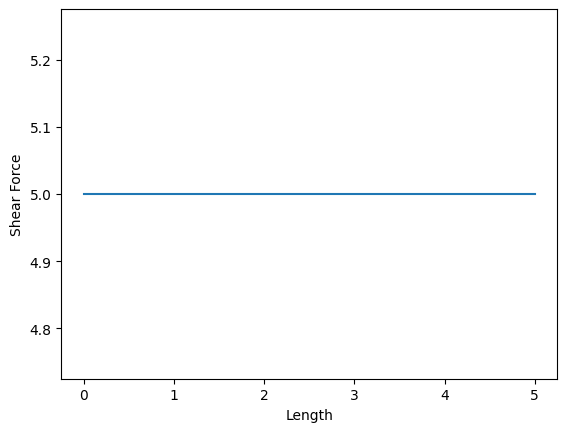

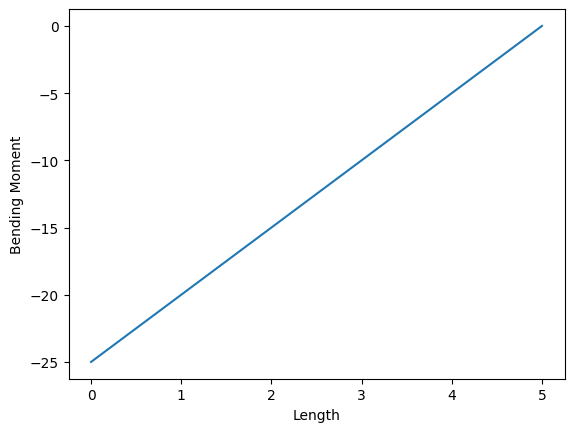

Length of point_loads: 1
Length of distances: 2
Bending Moment Equation:
M(x) = 25.0 - 5.0(x - 0.0) - 


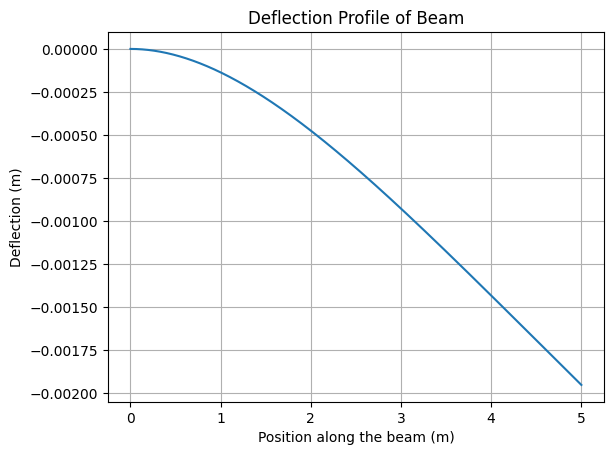

In [3]:
# Python program to generate the shear force and bending moment diagrams of cantilever and simply supported beams
# subject to multiple conditions
import math
import matplotlib.pyplot as plt
import numpy as np

# Inputs
# All forces are to be entered in kN
# All distances are to be entered in m
# The magnitude of UDL is to be entered in kN/m
n = input("enter the number of forces: ")
n = int(n)
E = float(input("Enter the Elastic modulus of the beam: ")) #E in GPa

# To calculate Second moment of Area(Izz)
b = float(input("Enter the width of the beam: ")) #in m
h = float(input("Enter the height of the beam: ")) #in m
I = float((b*h*h*h) / 12) #in m^4
A = float(input("Enter the cross sectional area: "))#in m^2

#Input statements for forces and their corresponding distance from origin
point_loads = []
plds_1 = []
distances = []
d_1 = []
for i in range(1,n+1):
    f_i = float(input('enter the magnitude of ' + str(i) + ' force: '))
    point_loads.append(f_i)
    plds_1.append(f_i)
    l_i = float(input('enter the distance of ' + str(i) + ' force from origin: '))
    distances.append(l_i)
    d_1.append(l_i)

# Input statement for the total length of the beam
L = float(input('enter the total length of the beam: '))

# Input statements for the parameters of a unifromly distributed load
udl = 0
span = 0
D_O = 0
x1 = 0
x2 = 0
answer = input("Is a Uniformly Distributed Load acting on the beam?")
if answer == "yes":
    udl = float(input('enter the magnitude of udl:'))
    span = float(input('enter the span of UDL:'))
    D_O = float(input('enter the distance of udl converted to point load from origin:'))
    x1 = float(input('enter the distance of starting point of udl from origin: '))
    x2 = float(input('enter the distance of ending point of udl from origin: '))
elif answer == "no":
    print("no udl exists")

# Determination of the type of beam
Type_of_beam = input("enter the type of beam: ")
if Type_of_beam == "cantilever beam":
    # Reaction force and moment at the fixed end
    # Calculation of reaction force
    sum = sum(point_loads)
    R_F = sum + (udl*span)

    # Calculation of reaction moment
    product_ctbeam = []
    for i in range(0,n):
        p = point_loads[i]*distances[i]
        product_ctbeam.append(p)
    temp_1 = 0
    for j in range(0,len(product_ctbeam)):
        temp_1 = temp_1 + product_ctbeam[j]
    R_M = temp_1 + (udl*span*D_O)

    # Shear force calculation
    # The shear force remains constant at origin irrespective of the positions of other loads
    if (answer == 'yes') and (len(distances) != 0):
        sf_origin = sum + (udl*span)

    # Calculation of shear force when a point load is followed by a udl
        if distances[0] < x1:
            sf_pl1 = sum + (udl*span)
            sf_x1 = point_loads[n-1] + (udl*span)
            sf_x2 = point_loads[n-1]

    # Calculation of shear force when a udl is followed by a point load
        elif distances[0] > x1:
            sf_x1 = (udl*span) + sum
            sf_x2 = sum
            sf_pl1 = point_loads[n-1]

    # Calculation of shear force when a point load is acting at the end-point of the beam
        if distances[n-1] == L:
            sf_end = point_loads[n-1]

    # Calculation of shear force when a point load is acting ahead of the end-point of the beam
        elif distances[n-1] < L:
            sf_pl2 = point_loads[n-1]
            sf_end = 0

    # Plotting the shear force diagrams(following the order of calculation as stated above)
        if (distances[0] < x1) and (distances[n-1] == L):
            plt.plot([0,distances[0],x1,x2,distances[1]],[sf_origin,sf_pl1,sf_x1,sf_x2,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] == L):
            plt.plot([0,x1,x2,distances[0],distances[1]],[sf_origin,sf_x1,sf_x2,sf_pl1,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()
        elif (distances[0] < x1) and (distances[n-1] < L):
            plt.plot([0,distances[0],x1,x2,distances[1],L],[sf_origin,sf_pl1,sf_x1,sf_x2,sf_pl2,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] < L):
            plt.plot([0,x1,x2,distances[0],distances[1],L],[sf_origin,sf_x1,sf_x2,sf_pl1,sf_pl2,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()

    # Calculation of shear forces and plotting the shear force diagrams when point loads are acting and udl is zero
    if answer == "no":
        sf = []
        for k in range(0,n):
            add = 0
            for l in range(k,n):
                add = add + point_loads[l]
            sf.append(add)
        sf.append(point_loads[n-1])
        distances.append(0)
        for z in range(n,0,-1):
            distances[z] = distances[z-1]
        distances[0] = distances[0] - distances[0]
        plt.plot(distances,sf)
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()

    # Calculation of shear forces and plotting the shear force diagrams when udl is acting and point loads are zero
    if (len(distances) == 0) and (x1 == 0):
        sf_origin = (udl*span)
        sf_end = 0
        plt.plot([x1,x2],[sf_origin,sf_end])
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()
    elif (len(distances) == 0) and (x1 != 0):
        sf_origin = (udl*span)
        sf_x1 = (udl*span)
        sf_x2 = 0
        plt.plot([0,x1,x2],[sf_origin,sf_x1,sf_x2])
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()
    elif (len(distances) == 0) and (x2 < L):
        sf_origin = (udl*span)
        sf_x1 = (udl*span)
        sf_x2 = 0
        sf_end = 0
        plt.plot([0,x1,x2,L],[sf_origin,sf_x1,sf_x2,sf_end])
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()

    # Bending Moment Calculations
    # In the case of a cantilever beam, the bending moment is zero at the free end
    if len(distances) != 0:

        # Calculation of bending moment when a point load is followed by a udl
        if (distances[0] < x1):
            bm_origin = -b - (udl*span*D_O)
            bm_pl1 = -(point_loads[1]*(distances[1] - distances[0])) - (udl*span*(D_O - distances[0]))
            bm_x1 = -(point_loads[1]*(distances[1] - x1)) - (udl*span*(D_O - x1))
            bm_x2 = -(point_loads[1]*(distances[1] - x2))

        # Calculation of bending moment when a udl is followed by a point load
        elif distances[0] > x1:
            bm_origin = -b - (udl*span*D_O)
            bm_x1 = -(point_loads[0]*(distances[0] - x1)) - (point_loads[1]*(distances[1] - x1)) - (udl*span*(x2-x1))
            bm_x2 = -(point_loads[0]*(distances[0] - x2)) - (point_loads[1]*(distances[1] - x2))
            bm_pl1 = -(point_loads[1]*(distances[1] - distances[0]))

        # Calculation of bending moment when a point load is acting at the end-point of the beam
        if distances[n-1] == L:
            bm_end = 0

        # Calculation of bending moment when a point load is acting ahead of the end-point of the beam
        elif distances[n-1] < L:
            bm_pl2 = 0
            bm_end = 0

        # Plotting the bending moment diagrams(following the order of calculation as stated above)
        if (distances[0] < x1) and (distances[n-1] == L):
            plt.plot([0,distances[0],x1,x2,distances[1]],[bm_origin,bm_pl1,bm_x1,bm_x2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] == L):
            plt.plot([0,x1,x2,distances[0],distances[1]],[bm_origin,bm_x1,bm_x2,bm_pl1,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif (distances[0] < x1) and (distances[n-1] < L):
            plt.plot([0,distances[0],x1,x2,distances[1],L],[bm_origin,bm_pl1,bm_x1,bm_x2,bm_pl2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] < L):
            plt.plot([0,x1,x2,distances[0],distances[1],L],[bm_origin,bm_x1,bm_x2,bm_pl1,bm_pl2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()

    # Calculation of bending moment and plotting the bending moment diagrams when point loads are acting and udl is zero
    if answer == 'no':
        distances.pop(0)
        bm = []
        for i in range(0,n):

            sum = 0
            for j in range(i,n):
                sum = sum - (point_loads[j]*d_1[j])
            sub = d_1[i]
            for k in range(0,n):
                d_1[k] = d_1[k] - sub
            bm.append(sum)
        bm.append(0)
        distances.append(0)
        for z in range(n,0,-1):
            distances[z] = distances[z-1]
        distances[0] = distances[0] - distances[0]
        plt.plot(distances,bm)
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()

    # Calculation of bending moment and plotting the bending moment diagrams when udl is acting and point loads are zero
    if (len(distances) == 0) and (x1 == 0):
        bm_origin = -(udl*span*D_O)
        bm_end = 0
        plt.plot([x1,x2],[bm_origin,bm_end])
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()
    elif (len(distances) == 0) and (x1 != 0):
        bm_origin = -(udl*span*D_O)
        bm_x1 = -(udl*span*(D_O-x1))
        bm_end = 0
        plt.plot([0,x1,x2],[bm_origin,bm_x1,bm_end])
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()
    elif (len(distances) == 0) and (x2 < L):
        bm_origin = -(udl*span*D_O)
        bm_x1 = -(udl*span*(D_O-x1))
        bm_x2 = 0
        bm_end = 0
        plt.plot([0,x1,x2,L],[bm_origin,bm_x1,bm_x2,bm_end])
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()

elif Type_of_beam == "simply supported beam":
    # Calculation of reaction forces
    sof = 0
    for k in range(0,len(point_loads)):
        sof = sof + point_loads[k]
    product_ssbeam = []
    for i in range(0,n):
        product_ssbeam.append(point_loads[i]*distances[i])
    temp_2 = 0
    for j in range(0,len(product_ssbeam)):
        temp_2 = temp_2 + product_ssbeam[j]
    R_end = (temp_2 + (udl*span*D_O))/(L)
    R_origin = sof + (udl*span) - R_end

    # Calculation of shear forces
    # The shear force remains constant at origin irrespective of the positions of other loads
    if (answer == 'yes') and (len(distances) != 0):
        sf_origin = sof + (udl*span) - R_end

        # Calculation of shear force when a point load is followed by a udl
        if distances[0] < x1:
            sf_pl1 = sof + (udl*span) - R_end
            sf_x1 = point_loads[n-1] + (udl*span) - R_end
            sf_x2 = point_loads[n-1] - R_end

        # Calculation of shear force when a udl is followed by a point load
        elif distances[0] > x1:
            sf_x1 = sof + (udl*span) - R_end
            sf_x2 = sof - R_end
            sf_pl1 = sof - R_end

        # Calculation of shear force when a point load is acting at the end-point of the beam
        if distances[n-1] == L:
            sf_end = point_loads[n-1] - R_end

        # Calculation of shear force when a point load is acting ahead of the end-point of the beam
        elif distances[n-1] < L:
            sf_pl2 = point_loads[n-1] - R_end
            sf_end = -R_end

        # Plotting of shear force diagrams in the order of calculation above
        if (distances[0] < x1) and (distances[n-1] == L):
            plt.plot([0,distances[0],x1,x2,L],[sf_origin,sf_pl1,sf_x1,sf_x2,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] == L):
            plt.plot([0,x1,x2,distances[0],L],[sf_origin,sf_x1,sf_x2,sf_pl1,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()
        elif (distances[0] < x1) and (distances[n-1] < L):
            plt.plot([0,distances[0],x1,x2,distances[1],L],[sf_origin,sf_pl1,sf_x1,sf_x2,sf_pl2,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] < L):
            plt.plot([0,x1,x2,distances[0],distances[1],L],[sf_origin,sf_x1,sf_x2,sf_pl1,sf_pl2,sf_end])
            plt.xlabel("Length")
            plt.ylabel("Shear Force")
            plt.show()

    # Calculation of shear forces and plotting the shear force diagrams when point loads are acting and udl is zero
    if answer == "no":
        sf = []
        temp_add = 0
        for i in range(0,len(plds_1)):
            temp_add = temp_add + plds_1[i]
            sf.append(temp_add)
        for j in range(0,len(sf)):
            sf[j] = R_origin - sf[j]
        sf.insert(0,R_origin)
        sf.insert(len(sf)+1,R_end)
        d_1.insert(0,0)
        d_1.insert(len(sf)+1,L)
        plt.plot(d_1,sf)
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()
    # Calculation of shear forces and plotting the shear force diagrams when udl is acting and point loads are zero
    if (len(distances) == 0) and (x1 == 0):
        sf_origin = R_origin
        sf_center = 0
        sf_end = -R_end
        plt.plot([x1,L/2,x2],[sf_origin,sf_center,sf_end])
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()
    elif (len(distances) == 0) and (x1 != 0):
        sf_origin = R_origin
        sf_x1 = R_origin - (udl*span)
        sf_x2 = R_end
        plt.plot([0,x1,x2],[sf_origin,sf_x1,sf_x2])
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()
    elif (len(distances) == 0) and (x2 < L):
        sf_origin = R_origin
        sf_x1 = R_origin - (udl*span)
        sf_x2 = R_origin - (udl*span)
        sf_end = R_end
        plt.plot([0,x1,x2,L],[sf_origin,sf_x1,sf_x2,sf_end])
        plt.xlabel("Length")
        plt.ylabel("Shear Force")
        plt.show()

    # Bending Moment Calculations
    # In the case of a simply supported beam, bending moment is zero at supports
    if len(distances) != 0:
        # Calculation of bending moment when a udl is followed by a point load
        if distances[0] > x1:
            bm_origin = 0
            bm_x1 = (R_end*(L - x1)) - (udl*span*(D_O - x1))
            bm_x2 = (R_end*(L - x2))
    if len(point_loads) > 1 and len(distances) > 1:  # Check if there are enough elements in the lists
        bm_x1 -= point_loads[0]*(distances[0] - x1)  # Adjust the calculation if enough elements exist
        bm_x2 -= point_loads[1]*(distances[1] - x2)  # Adjust the calculation if enough elements exist
        bm_pl1 = (R_end*(L - distances[0])) - (point_loads[1]*(distances[1] - distances[0]))  # <-- Line 363

        # Calculation of bending moment when a point load is followed by a udl
        if distances[0] < x1:
            bm_origin = 0
            bm_pl1 = (R_end*(L - distances[0])) - (udl*span*(D_O-distances[0])) - (point_loads[1]*(distances[1]-distances[0]))
            bm_x1 = (R_end*(L - x1)) - (udl*span*(D_O - x1)) - (point_loads[1]*(distances[1] - x1))
            bm_x2 = (R_end*(L - x2)) - (point_loads[1]*(distances[1] - x2))

        # Calculation of bending moment when a udl is followed by a point load
        elif distances[0] > x1:
            bm_origin = 0
            bm_x1 = (R_end*(L - x1)) - (point_loads[0]*(distances[0] - x1)) - (point_loads[1]*(distances[1] - x1)) - (udl*span*(D_O - x1))
            bm_pl1 = (R_end*(L - distances[0])) - (point_loads[1]*(distances[1] - distances[0]))

        # Calculation of bending moment when a point load is acting at the end-point of the beam
        if distances[n-1] == L:
            bm_end = 0

        # Calculation of bending moment when a point load is acting ahead of the end-point of the beam
        elif distances[n-1] < L:
            bm_pl2 = (R_end*(L - distances[1]))
            bm_end = 0

        # Plotting the bending moment diagrams(in the order stated above)
        if (distances[0] < x1) and (distances[n-1] == L):
            plt.plot([0,distances[0],x1,x2,L],[bm_origin,bm_pl1,bm_x1,bm_x2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] == L):
            plt.plot([0,x1,x2,distances[0],L],[bm_origin,bm_x1,bm_x2,bm_pl1,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif (distances[0] < x1) and (distances[n-1] < L):
            plt.plot([0,distances[0],x1,x2,distances[1],L],[bm_origin,bm_pl1,bm_x1,bm_x2,bm_pl2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif (distances[0] > x1) and (distances[n-1] < L):
            plt.plot([0,x1,x2,distances[0],distances[1],L],[bm_origin,bm_x1,bm_x2,bm_pl1,bm_pl2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()



    # Calculation of bending moment and plotting the bending moment diagrams when point loads are acting and udl is zero
    if answer == "no":
        if n >> 3:
            print("maximum number of forces = 3")
        elif n == 3:
            bm_origin = 0
            bm_pl1 = (R_end*(L - distances[0])) - (point_loads[2]*(distances[2] - distances[0])) - (point_loads[1]*(distances[1] - distances[0]))
            bm_pl2 = (R_end*(L - distances[1])) - (point_loads[2]*(distances[2] - distances[1]))
            bm_pl3 = (R_end*(L - distances[2]))
            bm_end = 0
            plt.plot([0,distances[0],distances[1],distances[2],L],[bm_origin,bm_pl1,bm_pl2,bm_pl3,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif n == 2:
            bm_origin = 0
            bm_pl1 = (R_end*(L - distances[0])) - (point_loads[1]*(L - distances[1]))
            bm_pl2 = (R_end*(L - distances[1]))
            bm_end = 0
            plt.plot([0,distances[0],distances[1],L],[bm_origin,bm_pl1,bm_pl2,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif n == 1:
            bm_origin = 0
            bm_pl1 = (R_end*(L - distances[0]))
            bm_end = 0
            plt.plot([0,distances[0],L],[bm_origin,bm_pl1,bm_end])
            plt.xlabel("Length")
            plt.ylabel("Bending Moment")
            plt.show()
        elif n == 0:
            print("bmd does not exist")

    # Calculation of bending moment and plotting the bending moment diagrams when udl is acting and point loads are zero
    if (len(distances) == 0) and (x1 == 0):
        bm_origin = 0
        bm_center = (udl*(pow(span,2)))/8
        bm_end = 0
        plt.plot([x1,L/2,x2],[bm_origin,bm_center,bm_end])
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()
    elif (len(distances) == 0) and (x1 != 0):
        bm_origin = 0
        bm_x1 = (R_end*(L - x1)) - (udl*span*(D_O - x1))
        bm_x2 = 0
        plt.plot([0,x1,x2],[bm_origin,bm_x1,bm_x2])
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()
    elif (len(distances) == 0) and (x2 < L):
        bm_origin = 0
        bm_x1 = (R_end*(L - x1)) - (udl*span*(D_O - x1))
        bm_x2 = (R_end*(L - x2))
        bm_end = 0
        plt.plot([0,x1,x2,L],[bm_origin,bm_x1,bm_x2,bm_end])
        plt.xlabel("Length")
        plt.ylabel("Bending Moment")
        plt.show()
print("Length of point_loads:", len(point_loads))
print("Length of distances:", len(distances))

# Bending Moment Equation
bending_moment_equation = ""
if Type_of_beam == "cantilever beam":
    bending_moment_equation = f"M(x) = {R_M} - "
    for i in range(len(point_loads)):
        bending_moment_equation += f"{point_loads[i]}(x - {distances[i]}) - "
    if answer == "yes":
        bending_moment_equation += f"{udl * span}(x - {D_O})u(x - {D_O})"

elif Type_of_beam == "simply supported beam":
    bending_moment_equation = f"M(x) = "
    for i in range(len(point_loads)):
        bending_moment_equation += f"{R_origin}x - "
        for j in range(i, len(point_loads)):
            bending_moment_equation += f"{point_loads[j]}(x - {distances[j]}) - "
        if i != len(point_loads) - 1:
            bending_moment_equation += f"{R_end}(x - {L})u(x - {L}) - "
        else:
            bending_moment_equation += f"{R_end}(x - {L})u(x - {L})"

print("Bending Moment Equation:")
print(bending_moment_equation)

# Define the properties of the beam material and cross-section
E = 200e9  # Young's modulus in Pa (for example, 200 GPa for steel)
I = 1e-6   # Moment of inertia in m^4 (for example, for a rectangular beam, I = (b * h^3) / 12)

# Calculate deflection using double integration method
deflection = []

# Define the function for the load intensity
def load_intensity(x):
    intensity = 0
    for i in range(len(point_loads)):
        if x >= distances[i]:
            intensity += point_loads[i]
    if answer == "yes" and x >= x1 and x <= x2:
        intensity += udl * (x - D_O)
    return intensity

# Define the deflection equation
deflection_eq = lambda x: (-1 / (24 * E * I)) * load_intensity(x) * x**2 * (x**2 - 4 * L * x + 6 * L**2)

# Integrate deflection equation twice to find constants C1 and C2
x_vals = np.linspace(0, L, 1000)  # Range of integration
integrand1 = [deflection_eq(x_val) for x_val in x_vals]
C1 = np.trapz(integrand1, x_vals)

integrand2 = [deflection_eq(x_val) for x_val in x_vals]
C2 = np.trapz(integrand2, x_vals)

# Calculate deflection at each point
for x in x_vals:
    deflection.append(deflection_eq(x))

# Plot the deflection profile1
plt.plot(x_vals, deflection)
plt.xlabel("Position along the beam (m)")
plt.ylabel("Deflection (m)")
plt.title("Deflection Profile of Beam")
plt.grid(True)
plt.show()